## 1. Importing data part 1
<p>What an exciting <a href="https://www.fifa.com/womensworldcup/">FIFA Women's World Cup</a>! Congratulations to the <a href="https://www.ussoccer.com/teams/uswnt">US Women's National Team</a> and to all the <a href="https://www.fifa.com/womensworldcup/teams/">national teams</a> who made the tournament such a great event!</p>
<p><img src="https://assets.datacamp.com/production/project_758/img/football_soccer.jpg" alt="football">
<em>Source: <a href="https://commons.wikimedia.org/wiki/File:Football_pictogram.svg">Wikimedia Commons</a></em></p>
<p>Now that the tournament is over, our boss at <em>Crunching Numbers</em> needs to know which match/stadium had the highest attendance during the women's world cup. Thankfully, one of our trusty interns, Bob, already has the data for us. After chatting with Bob about his football (soccer in the US) obsession, we learned that he collected the data by either watching the games or reading the <a href="https://www.fifa.com/womensworldcup/matches/?#groupphase">FIFA Women's World Cup match reports</a>. He manually entered the data into a flat file (.csv) and emailed it to us.</p>
<p>Let's read in the file and explore the raw data!</p>

In [243]:
# In this project code scaffolding will only be given for functions that were not 
# explained in the prerequisite courses. Look at the hints if you need help.

# Load the packages
library(readr)
library(dplyr)

# Read in the data from the datasets folder
wwc_raw <- read_csv("datasets/2019_WWCFIFA_summary.csv")

# Check the dimensions and structure of the data
glimpse(wwc_raw)

Parsed with column specification:
cols(
  Round = col_character(),
  Wk = col_character(),
  Day = col_character(),
  Date = col_character(),
  Time = col_time(format = ""),
  Home = col_character(),
  Score = col_character(),
  PKS = col_character(),
  Away = col_character(),
  Attendance = col_double(),
  Venue = col_character(),
  Referee = col_character(),
  Notes = col_character()
)


Rows: 55
Columns: 13
$ Round      <chr> "Group stage", "Group stage", "Group stage", "Group stag...
$ Wk         <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "...
$ Day        <chr> "Fri", "Sat", "Sat", "Sat", "Sun", "Sun", "Sun", "Mon", ...
$ Date       <chr> "06/07/19", "06/08/19", "06/08/19", "06/08/19", "06/09/1...
$ Time       <time> 21:00:00, 15:00:00, 18:00:00, 21:00:00, 13:00:00, 15:30...
$ Home       <chr> "France", "Germany", "Spain", "Norway", "Australia", "Br...
$ Score      <chr> "4 - 0", "1 - 0", "3 - 1", "3 - 0", "1 - 2", "3 - 0", "2...
$ PKS        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ Away       <chr> "Korea Rep", "China PR", "South Africa", "Nigeria", "Ita...
$ Attendance <dbl> 45261, 15283, 12044, 11058, 15380, 17668, 13188, 25055, ...
$ Venue      <chr> "Parc des Princes", "Roazhon Park", "Stade Oceane", "Sta...
$ Referee    <chr> "Claudia Umpierrez", "Marie-Soleil Beaudoin", "Maria Car...
$ Notes      <chr> NA, NA, NA, 

## 2. Importing data part 2
<p>Looking at the outputs, we notice a few things about the data. First, we have some <code>NA</code>s to address. Second, most of the columns are of type <code>character</code>. One of the differences between <code>read_csv()</code> (<code>readr</code>) and <code>read.csv()</code> (<code>utils</code>) is how character strings are treated. With <code>read.csv()</code> strings are coerced to factors, while in <code>read_csv()</code> strings are not coerced. Let's import the data again, but this time, we will assign data types to the <code>Round</code>, <code>Date</code>, and <code>Venue</code> columns. </p>
<p><br></p>
<p><strong>Instructor's note</strong>: My apologies for several incorrect spellings. Stade Oceane should be <em>Stade Océane</em>. The correct spellings of the names of the referees are <em>Stéphanie Frappart</em>, <em>Katalin Kulcsár</em>, and <em>Claudia Umpiérrez</em>. Accents are not currently supported in Jupyter Notebook outputs on DataCamp and had to be removed from the data file. </p>

In [245]:
# Read in the data specifying column types
wwc_raw <- read_csv("datasets/2019_WWCFIFA_summary.csv",
                col_types = cols(
                                Round = col_factor(),
                                Date = col_date(format = "%m/%d/%y"),
                                Venue = col_factor()
                                  )
                 )

# Look at the summary and structure of the data
glimpse(wwc_raw)

# Print the dataset
print(wwc_raw)

Rows: 55
Columns: 13
$ Round      <fct> Group stage, Group stage, Group stage, Group stage, Grou...
$ Wk         <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "...
$ Day        <chr> "Fri", "Sat", "Sat", "Sat", "Sun", "Sun", "Sun", "Mon", ...
$ Date       <date> 2019-06-07, 2019-06-08, 2019-06-08, 2019-06-08, 2019-06...
$ Time       <time> 21:00:00, 15:00:00, 18:00:00, 21:00:00, 13:00:00, 15:30...
$ Home       <chr> "France", "Germany", "Spain", "Norway", "Australia", "Br...
$ Score      <chr> "4 - 0", "1 - 0", "3 - 1", "3 - 0", "1 - 2", "3 - 0", "2...
$ PKS        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ Away       <chr> "Korea Rep", "China PR", "South Africa", "Nigeria", "Ita...
$ Attendance <dbl> 45261, 15283, 12044, 11058, 15380, 17668, 13188, 25055, ...
$ Venue      <fct> Parc des Princes, Roazhon Park, Stade Oceane, Stade Augu...
$ Referee    <chr> "Claudia Umpierrez", "Marie-Soleil Beaudoin", "Maria Car...
$ Notes      <chr> NA, NA, NA, 

## 3. Removing rows of NA
<p>We have 55 observations (rows) of 13 variables (columns). Hmmm, we know there were 52 games - why the extra rows? Also <code>Round</code> and <code>Attendance</code> each have three <code>NA</code>, and <code>Date</code> and <code>Venue</code> each have four <code>NA</code>. It looks like we have a few things to fix.</p>
<ul>
<li>Rows of NA</li>
<li>Missing data values</li>
<li>Multiple values in one column (look at <code>Score</code> and <code>PKS</code>)</li>
<li>Column headers are a mix of upper- and lowercase letters</li>
</ul>
<p>The last issue is more of a preference. Having all the column names in the same case will make typing easier.</p>
<p>Great hustle on Bob's part for collecting the information we need, but he gets a yellow card for inserting the rows of <code>NA</code>.  Let's start cleaning the data by putting the column names in lowercase and removing the rows of <code>NA</code>.</p>

In [247]:
# load the package
library(tidyr)

# Remove rows of NA
wwc_1  <- wwc_raw  %>% 
 rename_all(tolower)  %>% 
 filter(!is.na(wwc_raw))

# Get the dimensions and inspect the first 10 and last 10 rows
glimpse(wwc_1)

Rows: 52
Columns: 13
$ round      <fct> Group stage, Group stage, Group stage, Group stage, Grou...
$ wk         <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "...
$ day        <chr> "Fri", "Sat", "Sat", "Sat", "Sun", "Sun", "Sun", "Mon", ...
$ date       <date> 2019-06-07, 2019-06-08, 2019-06-08, 2019-06-08, 2019-06...
$ time       <time> 21:00:00, 15:00:00, 18:00:00, 21:00:00, 13:00:00, 15:30...
$ home       <chr> "France", "Germany", "Spain", "Norway", "Australia", "Br...
$ score      <chr> "4 - 0", "1 - 0", "3 - 1", "3 - 0", "1 - 2", "3 - 0", "2...
$ pks        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ away       <chr> "Korea Rep", "China PR", "South Africa", "Nigeria", "Ita...
$ attendance <dbl> 45261, 15283, 12044, 11058, 15380, 17668, 13188, 25055, ...
$ venue      <fct> Parc des Princes, Roazhon Park, Stade Oceane, Stade Augu...
$ referee    <chr> "Claudia Umpierrez", "Marie-Soleil Beaudoin", "Maria Car...
$ notes      <chr> NA, NA, NA, 

## 4. Replacing NA
<p>Excellent! We now have 52 rows. Each row corresponds to a match in the tournament. But, it looks like there are a couple <code>NA</code> still lurking about in <code>date</code> and <code>venue</code>. Using <code>colSums()</code> and <code>is.na()</code> we can check to see how many <code>NA</code> are in each column.</p>
<p><img src="https://assets.datacamp.com/production/project_758/img/colSums_output.png" alt="colSums output"></p>
<p><br></p>
<p>We only have the one <code>NA</code> in <code>date</code> and one <code>NA</code> in <code>venue</code>. We would expect the <code>notes</code> column to have several <code>NA</code>, but what about <code>pks</code>? <code>pks</code> is the column for penalty kicks. It has 51 <code>NA</code>. A good guess would be that only one match ended in penalty kicks, and according to Bob, that is correct. We'll deal with the double data in <code>score</code> and <code>pks</code> shortly. Now we are going to clean <code>date</code> and <code>venue</code>.</p>

In [249]:
# Housekeeping
wwc_2  <- wwc_1

# Find, view, and replace NA in column date
index_date  <- which(is.na(wwc_2$date))
wwc_2[index_date,]
wwc_2$date[index_date]  <- "2019-06-09"

# Find, view, and replace NA in column venue
index_venue  <- which(is.na(wwc_2$venue))
wwc_2[index_venue,]
wwc_2$venue[index_venue]  <- "Groupama Stadium"

round,wk,day,date,time,home,score,pks,away,attendance,venue,referee,notes
<fct>,<chr>,<chr>,<date>,<time>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
Group stage,1,Sun,NA,15:30:00,Brazil,3 - 0,NA,Jamaica,17668,Stade des Alpes,Riem Hussein,NA


round,wk,day,date,time,home,score,pks,away,attendance,venue,referee,notes
<fct>,<chr>,<chr>,<date>,<time>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
Semifinals,SMIF,Tue,2019-07-02,21:00:00,England,1 - 2,NA,USA,53512,NA,Edina Alves Batista,NA


## 5. separate() and replace_na()
<p>All right! The data are looking good, but it is a good idea to get the two data points in <code>score</code> and two data points in <code>pks</code> into their own columns for future data sleuthing.</p>
<p>For this task we're going to employ the functionality of <code>separate()</code>, <code>mutate()</code>, and <code>replace_na()</code>. Look back at the directions in Task 4 to see an example of how <code>mutate()</code> and <code>replace_na()</code> are used together. We'll use the pipe operator, <code>%</code>, to pipe the functions together for readability. </p>

In [251]:
# Separate columns and replace NA (you've got this!)
wwc_3  <- wwc_2  %>% 
  separate(score, c("home_score","away_score"), sep = "-", convert = T) %>%
  separate(pks, c("home_pks","away_pks"), sep = "-", convert = T) %>%
  mutate(home_pks = replace_na(home_pks,0),
        away_pks = replace_na(away_pks,0))

# Print the data
print(wwc_3)

# A tibble: 52 x 15
   round wk    day   date       time  home  home_score away_score home_pks
   <fct> <chr> <chr> <date>     <tim> <chr>      <dbl>      <int>    <dbl>
 1 Grou~ 1     Fri   2019-06-07 21:00 Fran~          4          0        0
 2 Grou~ 1     Sat   2019-06-08 15:00 Germ~          1          0        0
 3 Grou~ 1     Sat   2019-06-08 18:00 Spain          3          1        0
 4 Grou~ 1     Sat   2019-06-08 21:00 Norw~          3          0        0
 5 Grou~ 1     Sun   2019-06-09 13:00 Aust~          1          2        0
 6 Grou~ 1     Sun   2019-06-09 15:30 Braz~          3          0        0
 7 Grou~ 1     Sun   2019-06-09 18:00 Engl~          2          1        0
 8 Grou~ 1     Mon   2019-06-10 18:00 Arge~          0          0        0
 9 Grou~ 1     Mon   2019-06-10 21:00 Cana~          1          0        0
10 Grou~ 1     Tue   2019-06-11 15:00 New ~          0          1        0
# ... with 42 more rows, and 6 more variables: away_pks <dbl>, away <chr>,
#   a

## 6. Plotting for outliers
<p>We corrected the <code>NA</code> in the <code>date</code> and <code>venue</code> columns, and separated the <code>score</code> and <code>pks</code> columns to have one score per column. </p>
<p>Now we can take a look at <code>attendance</code> and find the information the boss wants. Let's plot the data to see if there are any outliers. </p>

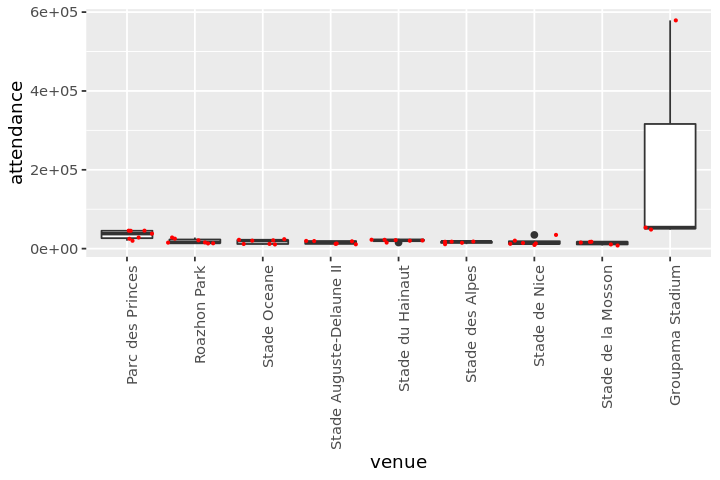

In [253]:
# Housekeeping for plot size
options(repr.plot.width=6, repr.plot.height=4)

# Load the package
library(ggplot2)

# Make a boxplot of attendance by venue and add the point data
ggplot(wwc_3, aes(venue,attendance)) +
  geom_boxplot() +
  geom_jitter(color = "red", size = 0.5) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

## 7. What to do with the outlier?
<p>Whoa! What’s up with the attendance for Groupama Stadium? One data point is almost 600,000 (6e+05*) while all the other data points are less than 100,000. That does not seem right.  </p>
<p>After chatting with Bob about the outlier and checking the match report, we learned that Bob mistakenly added an extra 0. We can fix that! Let's summarize the attendance by the venue, fix the outlier, and create a new summary table with the updated data.</p>
<p><code>*</code> For fun, add <code>scale_y_continuous(labels = scales::comma)</code> as the last line of the call to <code>ggplot()</code> in Task 6 and see how the y-axis value labels change.</p>

In [255]:
# Summarize the number of games, and min and max attendance for each venue
wwc_3  %>% 
  group_by(venue) %>%
  summarise(num_games = n(),
           min_attendance = min(attendance),
           max_attendance = max(attendance))

# Correct the outlier
wwc_4  <- wwc_3  %>% 
  mutate(attendance = replace(attendance,which(attendance == 579000),57900))

# Print an updated summary table 
wwc_venue_summary <- wwc_4  %>% 
group_by(venue) %>%
  summarise(num_games = n(),
           min_attendance = min(attendance),
           max_attendance = max(attendance))
wwc_venue_summary

`summarise()` ungrouping output (override with `.groups` argument)


venue,num_games,min_attendance,max_attendance
<fct>,<int>,<dbl>,<dbl>
Parc des Princes,7,20011,45595
Roazhon Park,7,13201,28267
Stade Oceane,7,10654,23965
Stade Auguste-Delaune II,6,11058,19633
Stade du Hainaut,6,15380,22600
Stade des Alpes,5,11252,17988
Stade de Nice,6,9354,34872
Stade de la Mosson,5,8009,17492
Groupama Stadium,3,48452,579000


`summarise()` ungrouping output (override with `.groups` argument)


venue,num_games,min_attendance,max_attendance
<fct>,<int>,<dbl>,<dbl>
Parc des Princes,7,20011,45595
Roazhon Park,7,13201,28267
Stade Oceane,7,10654,23965
Stade Auguste-Delaune II,6,11058,19633
Stade du Hainaut,6,15380,22600
Stade des Alpes,5,11252,17988
Stade de Nice,6,9354,34872
Stade de la Mosson,5,8009,17492
Groupama Stadium,3,48452,57900


## 8. A pretty boxplot
<p>Let's make a boxplot of the attendance by venue again. The first outlier was extreme and might have masked other problems. </p>
<p>This time we will clean up the plot by setting the theme, adding a title, a subtitle, x and y labels, and we will flip the axes to make it easier to read the venue names. We are also going to angle the x-axis text so the numbers will fit within the plot space. And to be fancy, we are going to reorder <code>venue</code> by  the attendance within the plot aesthetics so the venues display in descending order of mean attendance.  </p>

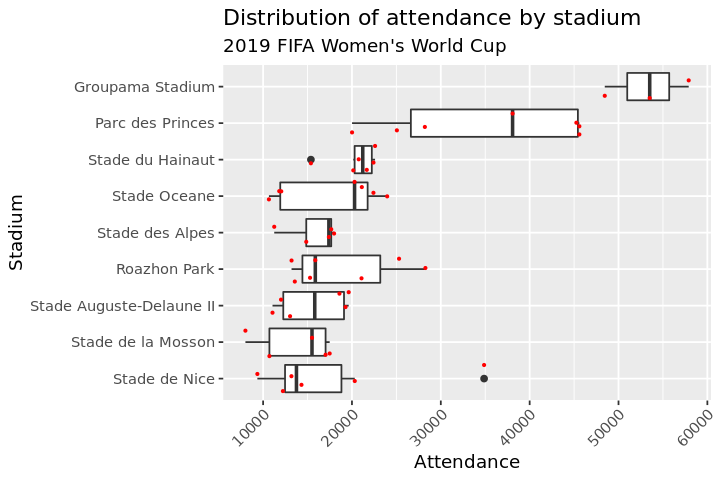

In [257]:
# Housekeeping for plot size
options(repr.plot.width=6, repr.plot.height=4)

# Prettier boxplot of attendance data by venue
wwc_4  %>% 
  ggplot(aes(x = forcats::fct_reorder(venue, attendance), y = attendance)) +
    geom_boxplot() +
    geom_jitter(color = "red", size = 0.5) +
    coord_flip() +
    theme(axis.text.x = element_text(angle = 45, , hjust = 1)) +
    labs(title = "Distribution of attendance by stadium",
         subtitle = "2019 FIFA Women's World Cup",
         x = "Stadium", 
         y = "Attendance")

## 9. A pretty line plot
<p>Looks good!</p>
<p>That outlier for Stade de Nice looks a little suspect, but we checked the match reports, and the attendance numbers are correct. The suspect match was <a href="https://www.fifa.com/womensworldcup/matches/match/300438220/#match-liveblog">France vs. Norway</a> - the home nation favorite drew a large crowd wherever they played!</p>
<p>Now that the data are clean, let's plot the attendance at each stadium over time so we can tell the boss which stadium had the highest attendance during the tournament. </p>

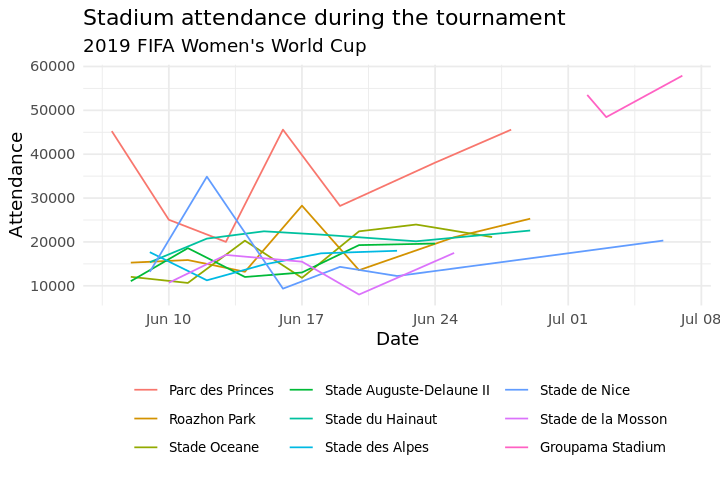

In [264]:
# Housekeeping for plot size
options(repr.plot.width=6, repr.plot.height=4)

# Line plot of attendance over time
wwc_4  %>% 
  ggplot(aes(date, attendance, color = venue)) +
  geom_line() +
  theme_minimal() +
  theme(legend.position = "bottom",
       legend.text = element_text(size = 8)) +
  guides(col = guide_legend(nrow = 3)) +
  labs(title = "Stadium attendance during the tournament",
       subtitle = "2019 FIFA Women's World Cup",
       x = "Date", 
       y = "Attendance",
      color = "") 

## 10. Wrap up
<p>Congratulations! You've made it to the end of the project.</p>
<p>Great job! We have a couple of beautiful plots to give our boss. With a little more code, we can answer her questions: </p>
<ol>
<li>What match had the highest attendance?</li>
<li>In what stadium was the match with the highest attendance played?</li>
</ol>

In [268]:



# What match had the higest attendance?
# A: wk = SMIF, England vs. USA
# B: wk = FIN, USA vs. Netherlands
# C: wk = SMIF, Netherlands vs. Sweden

ans_1  <- "B"

# In what stadium was the match with the highest attendance played?
# A: Groupama Stadium
# B: Parc des Princes
# C: Stade des Alpes

ans_2  <- ""

round,wk,day,date,time,home,home_score,away_score,home_pks,away_pks,away,attendance,venue,referee,notes
<fct>,<chr>,<chr>,<date>,<time>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<chr>
Final,FIN,Sun,2019-07-07,17:00:00,USA,2,0,0,0,Netherlands,57900,Groupama Stadium,Stephanie Frappart,NA
Semifinals,SMIF,Tue,2019-07-02,21:00:00,England,1,2,0,0,USA,53512,Groupama Stadium,Edina Alves Batista,NA
Semifinals,SMIF,Wed,2019-07-03,21:00:00,Netherlands,1,0,0,0,Sweden,48452,Groupama Stadium,Marie-Soleil Beaudoin,Required Extra Time
Quarterfinals,QRTF,Fri,2019-06-28,21:00:00,France,1,2,0,0,USA,45595,Parc des Princes,Kateryna Monzul,NA
Group stage,2,Sun,2019-06-16,18:00:00,USA,3,0,0,0,Chile,45594,Parc des Princes,Riem Hussein,NA
Group stage,1,Fri,2019-06-07,21:00:00,France,4,0,0,0,Korea Rep,45261,Parc des Princes,Claudia Umpierrez,NA
Round of 16,R16,Mon,2019-06-24,21:00:00,Sweden,1,0,0,0,Canada,38078,Parc des Princes,Kate Jacewicz,NA
Group stage,2,Wed,2019-06-12,21:00:00,France,2,1,0,0,Norway,34872,Stade de Nice,Bibiana Steinhaus,NA
Group stage,3,Mon,2019-06-17,21:00:00,Nigeria,0,1,0,0,France,28267,Roazhon Park,Melissa Borjas,NA
